In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

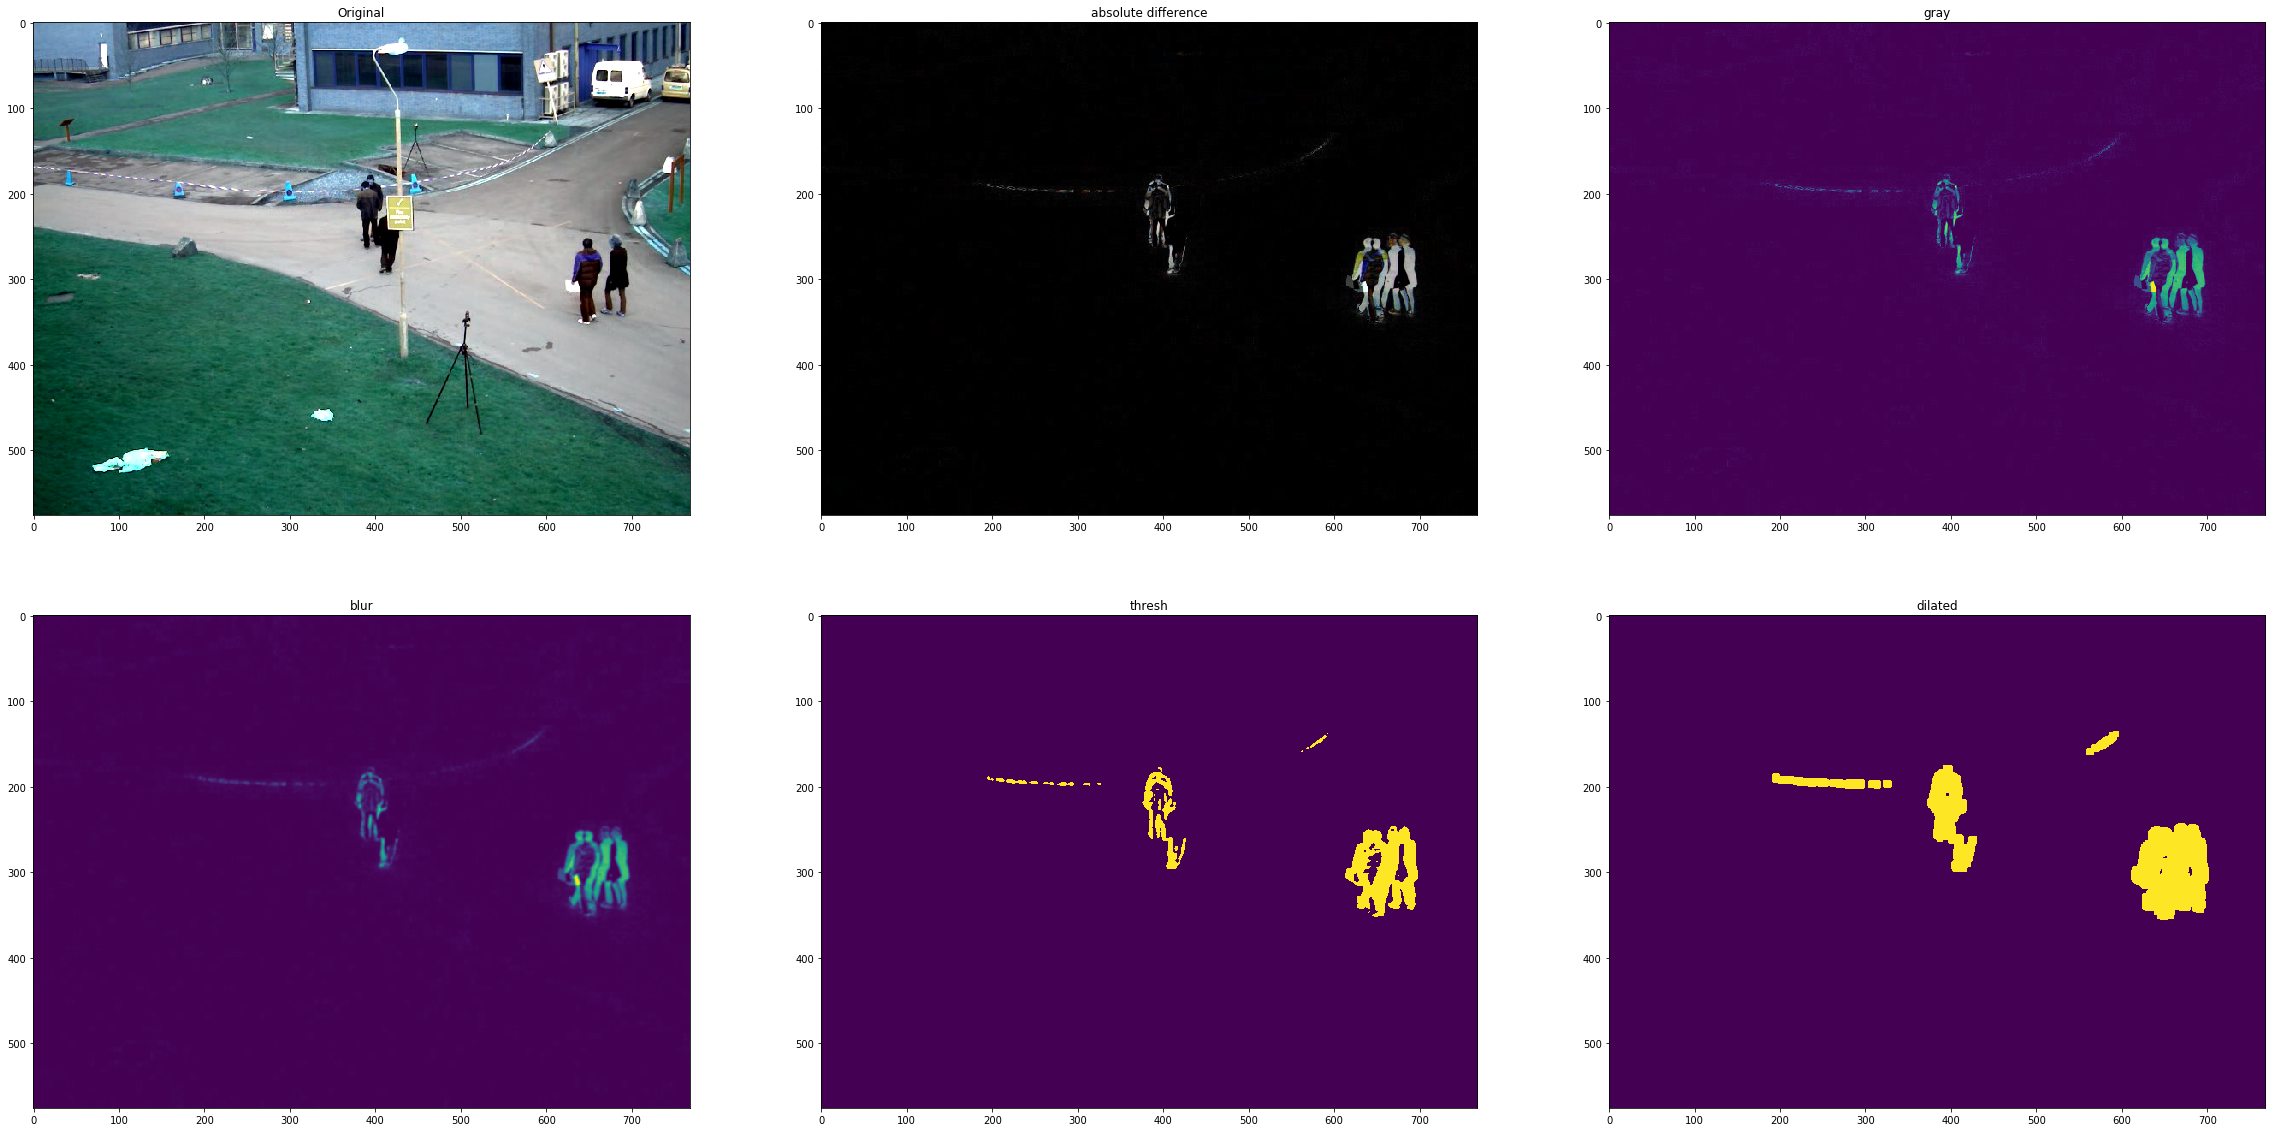

In [9]:
fig, ax = plt.subplots(2, 3, figsize = (40, 20))

cap = cv2.VideoCapture('C:\\Users\\80SM01YGIH\\Anish\\CV101\\vtest.avi')

ret, frame1 = cap.read()
ret, frame2 = cap.read()

while(cap.isOpened()):
    diff = cv2.absdiff(frame1, frame2)
    
    gray = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
    
    blur = cv2.GaussianBlur(gray, (5,5), 0)
    
    _, thresh = cv2.threshold(blur, 20, 255, cv2.THRESH_BINARY)
    
    dilated = cv2.dilate(thresh, None, iterations = 3)
    
    a = 0
    
    images, titles = [frame1, diff, gray, blur, thresh, dilated], ['Original', 'absolute difference', 'gray', 'blur', 'thresh', 'dilated']
    
    
    for i in range(2):
        for j in range(3):
            if a < 6:
                ax[i][j].imshow(images[a])
                ax[i][j].set_title(titles[a])
                a += 1
    
    contours, _ = cv2.findContours(dilated, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    for contour in contours:
        (x, y, w, h)=cv2.boundingRect(contour)
        
        if cv2.contourArea(contour) < 900:
            continue
        cv2.rectangle(frame1, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(frame1, 'Status: {}'.format('Movement'), (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 3)
    
    #cv2.drawContours(frame1, contours, -1, (0, 255, 0), 2)
    
    cv2.imshow('Feed', frame1)
    
    frame1 = frame2
    
    ret, frame2 = cap.read()
    
    if cv2.waitKey(40) == 27:
        break
        
cv2.destroyAllWindows()
cap.release()